In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn as sns

#### Reading column names

In [2]:
columns = pd.read_csv('Dataset/spambase.names', skiprows=32, sep=':\s+', engine='python', names=['attr', ''])
columns = columns['attr']
columns = list(columns)
columns.append('label')
columns

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [3]:
# importing dataset to operate
spamData = pd.read_csv('Dataset/spambase.data', names=columns)
spamData

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Exploring Data

#### Checking for all the columns for null values

In [4]:
spamData.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

#### Checking for Duplicate Values

In [5]:
spamData.drop_duplicates()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


#### Another method for checking Null Values but in a generalized way

In [6]:
spamData.isnull().values.any()

False

#### Checking Dataset's Info 

In [7]:
spamData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

#### Displaying some statistics 

In [8]:
print(spamData.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

#### Getting the column count

In [9]:
# Getting the column count
column_count = spamData.shape[1]

print("The dataset has", column_count, "columns.")

The dataset has 58 columns.


#### Plotting the distribution of the target variable

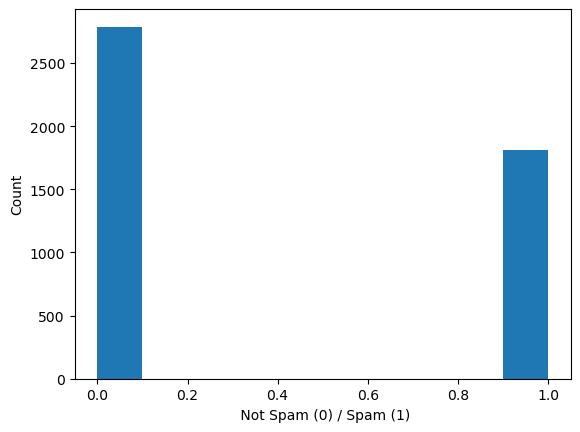

In [10]:
# Print the distribution of the target variable
plt.hist(spamData['label'])
plt.xlabel(' Not Spam (0) / Spam (1)')
plt.ylabel('Count')
plt.show()

#### Plotting the correlation matrix of the features

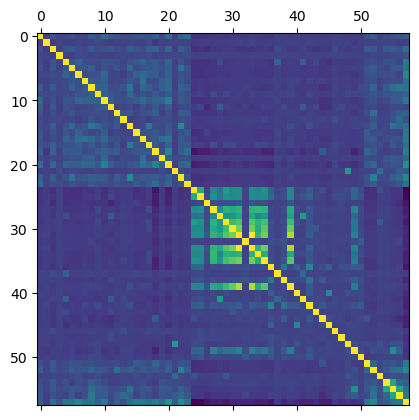

In [11]:
# Plot the correlation matrix of the features
corr_matrix = spamData.corr()
plt.matshow(corr_matrix)
plt.show()

#### Plotting a scatter matrix of a few features

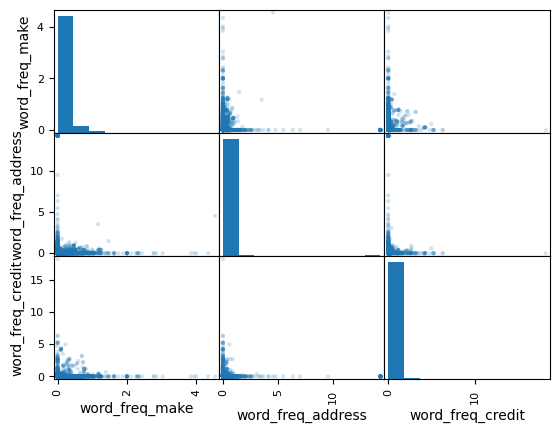

In [12]:
# Plotting a scatter matrix of a few features
pd.plotting.scatter_matrix(spamData[["word_freq_make", "word_freq_address", "word_freq_credit"]], alpha=0.2)
plt.show()

# Performing PCA

#### Spliting the dataset into features and target variable

In [13]:
# Split the dataset into features and target variable
X = spamData.iloc[:, :-1]  
y = spamData.iloc[:, -1]

In [14]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(spamData)

In [15]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X.T)

In [16]:
# Calculating the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [17]:
# Choosing the number of principal components
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance_ratio >= 0.8) + 1


In [18]:
# Putting the data onto the new coordinate system
from sklearn.decomposition import PCA
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

In [22]:
# Displaying the original shape of the data and the new shape after PCA
print("Original shape: ", X.shape)
print("New shape: ", X_pca.shape)

Original shape:  (4601, 58)
New shape:  (4601, 46)


In [23]:
# Creating a new dataframe with the principal components and the target variable
df = pd.DataFrame(data = X_pca, columns = [f'PC{i}' for i in range(1, X_pca.shape[1]+1)])
df['target'] = y

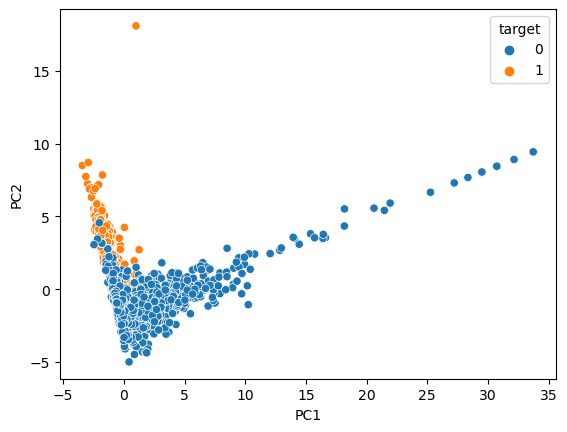

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Visualizing the results
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df)
plt.show()

In [25]:
# # Check for outliers
# sns.boxplot(data=df)
# plt.show()

# Explore the relationships between variables
# sns.pairplot(data=df)
# plt.show()

# Setting up the KNN Model

#### Splitting the dataset into features and target variable

In [29]:
# Split the dataset into features and target variable
X = spamData.iloc[:, :-1]  # Selecting all columns except the last one as features
y = spamData.iloc[:, -1]   # Selecting the last column as target variable

#### Split train and test data

In [30]:
from sklearn.model_selection import train_test_split

# spliting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Selection

In [31]:
# Feature Selection
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

#### Fitting classifier to the Training set

In [32]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

# Prediction

In [35]:
# Displaying first 5 model predictions on the test data

y_predict = classifier.predict(X_test)

print(y_predict[:5])

[1 0 0 1 1]


D:\Tools\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
